In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
census_raw = pd.read_csv("../Data files/county_census_and_election_result.csv")

In [3]:
census_raw.head()

,year,county_fips,inctot,mortamt1,avrg_age,ftotinc,foodstmp_1_freq,foodstmp_2_freq,sex_2_freq,sex_1_freq,...,empstat_3.0_freq,empstat_2.0_freq,state_po,county_name,democrat,green,liberitarian,other,republican,winner
0,2000,1,24566.4,634.6,46.0,46912.7,93.6,6.4,54.0,46.0,...,38.4,3.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,2,33842.9,1080.1,42.4,65021.9,95.3,4.7,50.3,49.7,...,25.2,4.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000,4,28331.7,814.7,45.3,52826.7,95.8,4.2,52.1,47.9,...,38.3,3.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000,5,22782.6,557.5,46.2,43941.3,92.5,7.5,53.0,47.0,...,37.8,3.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000,6,32245.0,1216.3,43.8,61455.3,95.7,4.3,52.0,48.0,...,35.1,3.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
race_chinese = census_raw.groupby(by=['year'])['race_4_freq'].mean().reset_index()

In [9]:
race_chinese.dtypes

year             int64
race_4_freq    float64
dtype: object

In [11]:
race_japanese = census_raw.groupby(by=['year'])['race_5_freq'].mean().reset_index()

In [12]:
race_japanese

,year,race_5_freq
0,2000,0.639216
1,2001,0.601961
2,2002,0.625490
3,2003,0.611765
4,2004,0.609804
5,2005,0.304471
6,2006,0.301415
7,2007,0.296226
8,2008,0.247406
9,2009,0.278066


### Average Chinese voter in percentage over year

<AxesSubplot:xlabel='year', ylabel='race_4_freq'>

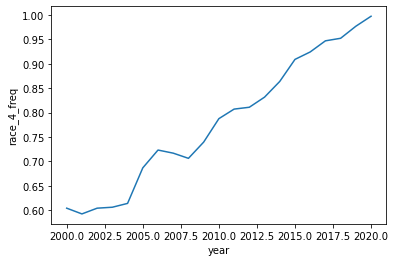

In [17]:
sns.lineplot(data=race_chinese,x='year',y='race_4_freq')

### Average japanese voter in percentage over year

<AxesSubplot:xlabel='year', ylabel='race_5_freq'>

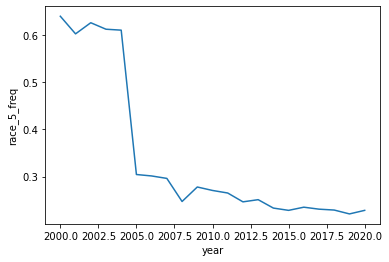

In [18]:
sns.lineplot(data=race_japanese,x='year',y='race_5_freq')

### Average percentage of english is spoken at home over the year

In [87]:
lang_1 = census_raw.groupby(by=['year','county_fips'])['lang_1_freq'].mean().reset_index()

<AxesSubplot:xlabel='year', ylabel='lang_1_freq'>

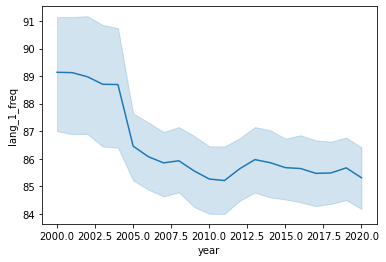

In [88]:
sns.lineplot(data=lang_1,x='year',y='lang_1_freq')

### Average percentage of other language is spoken at home over the year

In [81]:
lang_2 = census_raw.groupby(by=['year','county_fips'])['lang_2_freq'].mean().reset_index()

<AxesSubplot:xlabel='year', ylabel='lang_2_freq'>

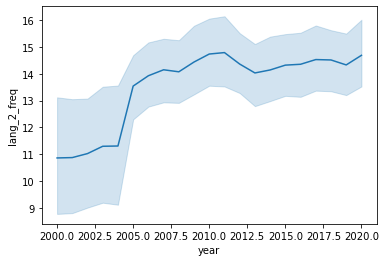

In [82]:
sns.lineplot(data=lang_2,x='year',y='lang_2_freq')

### Camperison of race other than white race with each other 

In [83]:
race = census_raw.groupby(by=['year'])['race_1_freq','race_2_freq','race_3_freq','race_4_freq','race_5_freq','race_6_freq','race_7_freq'].mean().reset_index()

C:\Users\ramas\AppData\Local\Temp\ipykernel_13296\3612249653.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  race = census_raw.groupby(by=['year'])['race_1_freq','race_2_freq','race_3_freq','race_4_freq','race_5_freq','race_6_freq','race_7_freq'].mean().reset_index()


In [84]:
race.drop(['year'],inplace=True,axis=1)

In [85]:
race.drop(['race_1_freq'],inplace=True,axis=1)

<AxesSubplot:>

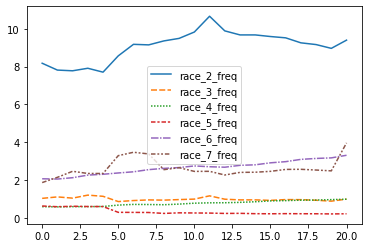

In [86]:
sns.lineplot(data=race)

### Average Annual Income of Individuals over the year

In [75]:
inctot = census_raw.groupby(by=['year','county_fips'])['inctot'].mean().reset_index()

<AxesSubplot:xlabel='year', ylabel='inctot'>

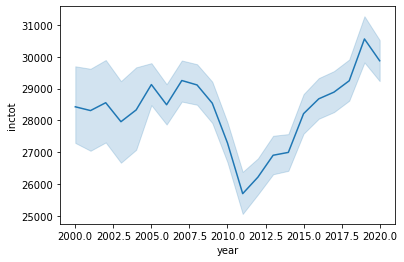

In [76]:
sns.lineplot(data=inctot,x='year',y='inctot')

### Average Annual Total Family Income over the year

In [73]:
ftotinc = census_raw.groupby(by=['year','county_fips'])['ftotinc'].mean().reset_index()

<AxesSubplot:xlabel='year', ylabel='ftotinc'>

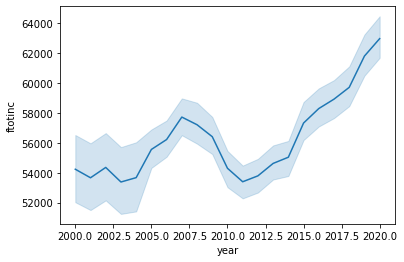

In [74]:
sns.lineplot(data=ftotinc,x='year',y='ftotinc')

### Top three year of  Average Annual Total Family Income

In [101]:
m_f = census_raw.groupby(by=['year'])['ftotinc'].mean().sort_values(ascending=False).reset_index()

In [106]:
m_f.iloc[:3]

,year,ftotinc
0,2020,62948.617992
1,2019,61784.873222
2,2018,59696.640795
